<a href="https://colab.research.google.com/github/ZemelakGoraga/food-and-agri/blob/main/avian_livestock_fishery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ZemelakGoraga/food-and-agri

Cloning into 'food-and-agri'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 27 (delta 6), reused 20 (delta 4), pack-reused 0
Receiving objects: 100% (27/27), 4.79 MiB | 20.11 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
# Data Collection
# Loading datasets from Kaggle
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelakgoraga","key":"9bcb68625f661266080d1c6be3de4b4b"}'}

In [3]:

# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

# Next, install the Kaggle API client.
!pip install -q kaggle

# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


-rw-r--r-- 1 root root 69 Sep  9 23:26 kaggle.json


In [4]:
# List the datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


 98% 436M/444M [00:05<00:00, 103MB/s] 
100% 444M/444M [00:05<00:00, 89.2MB/s]


In [6]:
# unzip the different data files
# There are above 150 tables in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)

current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [7]:
# Download a specific table to work with
# Here, I will download the following table, which contains imported live animals and products:
#  Table to download: "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv", and save it as df

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')


['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [8]:
# Viewing Data: display the first 5 rows of the df dataset

print(df.head())


   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  Head    NaN    M  
2       1963  1963  Head    NaN    M  
3       1964  1964  Head    NaN    M  
4       1965  1965  Head    NaN    M  


In [9]:
# Display the last 5 rows of the df dataset

print(df.tail())

        Area Code                                     Area  Item Code  \
662953       5817  Net Food Importing Developing Countries       1922   
662954       5817  Net Food Importing Developing Countries       1922   
662955       5817  Net Food Importing Developing Countries       1922   
662956       5817  Net Food Importing Developing Countries       1922   
662957       5817  Net Food Importing Developing Countries       1922   

                   Item  Element Code       Element  Year Code  Year  \
662953  Sheep and Goats          5922  Export Value       2009  2009   
662954  Sheep and Goats          5922  Export Value       2010  2010   
662955  Sheep and Goats          5922  Export Value       2011  2011   
662956  Sheep and Goats          5922  Export Value       2012  2012   
662957  Sheep and Goats          5922  Export Value       2013  2013   

            Unit      Value Flag  
662953  1000 US$   456293.0    A  
662954  1000 US$   421311.0    A  
662955  1000 US$   6493

In [10]:
#Understanding the Structure
# Get the number of rows and columns : the data set has 662958 rows and 11 columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Number of rows: 662958
Number of columns: 11


In [11]:
# Display column names
print("\nColumn names:")
print(df.columns)



Column names:
Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')


In [12]:
# Display unique values count for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nPotential Data Quality Issues (Categorical Columns):")
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"{column}: {unique_values_count} unique values")



Potential Data Quality Issues (Categorical Columns):
Area: 252 unique values
Item: 25 unique values
Element: 4 unique values
Unit: 4 unique values
Flag: 5 unique values


In [13]:
# Viewing unique values within each column

unique_areas = df['Area'].unique()

unique_items = df['Item'].unique()

unique_elements = df['Element'].unique()

unique_flags = df['Flag'].unique()

unique_years = df['Year'].unique()
unique_units = df['Unit'].unique()

print("Unique Areas:", unique_areas)

print("Unique Items:", unique_items)

print("Unique Elements:", unique_elements)

print("Unique Flags:", unique_flags)

print("Year:", unique_years)
print("Unit:", unique_units)

Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

In [19]:
# Select only required columns for analysis and save the data as cattle_filtered_df

selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
filtered_df = df[selected_columns]
print("Selected Data:")
print(filtered_df.head())

Selected Data:
          Area    Item          Element  Year  Unit  Value
0  Afghanistan  Cattle  Import Quantity  1961  Head    NaN
1  Afghanistan  Cattle  Import Quantity  1962  Head    NaN
2  Afghanistan  Cattle  Import Quantity  1963  Head    NaN
3  Afghanistan  Cattle  Import Quantity  1964  Head    NaN
4  Afghanistan  Cattle  Import Quantity  1965  Head    NaN


In [20]:
filtered_df.tail()

,Area,Item,Element,Year,Unit,Value
662953,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2009,1000 US$,456293.0
662954,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2010,1000 US$,421311.0
662955,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2011,1000 US$,649321.0
662956,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2012,1000 US$,778317.0
662957,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2013,1000 US$,1038636.0


In [22]:
# Next, let us rename the 'Area' column by 'Country' and remove the 'Item' column as cattle is the only unique value in it

# Rename the 'Area' column to 'Country'
filtered_df.rename(columns={'Area': 'Country'}, inplace=True)

# Remove the 'Item' column
#filtered_df = filtered_df.drop(columns=['Item'])

# Print the updated DataFrame
print(filtered_df.head())

       Country    Item          Element  Year  Unit  Value
0  Afghanistan  Cattle  Import Quantity  1961  Head    NaN
1  Afghanistan  Cattle  Import Quantity  1962  Head    NaN
2  Afghanistan  Cattle  Import Quantity  1963  Head    NaN
3  Afghanistan  Cattle  Import Quantity  1964  Head    NaN
4  Afghanistan  Cattle  Import Quantity  1965  Head    NaN


<ipython-input-22-a42965da38f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'Area': 'Country'}, inplace=True)


In [23]:
# Select the subset where 'Unit' is '1000 US$'
# As we can see below, there are a total of 21453 rows of the dataset where the 'Unit' column is '1000 US$'

cattle_filtered_df = filtered_df[filtered_df['Unit'] == '1000 US$']

# Print the selected subset DataFrame
print(cattle_filtered_df)

                                        Country             Item  \
53                                  Afghanistan           Cattle   
54                                  Afghanistan           Cattle   
55                                  Afghanistan           Cattle   
56                                  Afghanistan           Cattle   
57                                  Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

             Element  Year      Unit      Value  
53      Import Value  1961  1000 US$        NaN  
54      Import Value  1962  1000 US$        NaN  
55      Import Value  1963  1000 

In [25]:
# Select the subset where 'Unit' is '1000 Head'
# As we can see below, there is no row of the dataset where the 'Unit' column is '1000 Head', so there is no need to multiply the quantity by 1000 head
subset_filtered_df = filtered_df[filtered_df['Unit'] == '1000 Head']

# Print the selected subset DataFrame
print(subset_filtered_df)

                                        Country      Item          Element  \
106                                 Afghanistan  Chickens  Import Quantity   
107                                 Afghanistan  Chickens  Import Quantity   
108                                 Afghanistan  Chickens  Import Quantity   
109                                 Afghanistan  Chickens  Import Quantity   
110                                 Afghanistan  Chickens  Import Quantity   
...                                         ...       ...              ...   
662052  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662053  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662054  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662055  Net Food Importing Developing Countries   Turkeys  Export Quantity   
662056  Net Food Importing Developing Countries   Turkeys  Export Quantity   

        Year       Unit   Value  
106     1961  1000 Head     0

In [26]:
# Let us multiply the 'Value' column for the import and export values by '1000 US$' as follows:

# Create a boolean mask for rows where 'Unit' is '1000 US$'
mask = filtered_df['Unit'] == '1000 US$'

# Multiply 'Value' column by 1000 for the selected rows
filtered_df.loc[mask, 'Value'] = filtered_df.loc[mask, 'Value'] * 1000

# Print the updated DataFrame
print(filtered_df)

                                        Country             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

                Element  Year      Unit         Value  
0       Import Quantity  1961      Head           NaN  
1       Import Quantity  1962      Head           NaN  
2       Import 

In [27]:
# Let us multiply the 'Value' column for the import and export Quantities by '1000 head' as follows:

# Create a boolean mask for rows where 'Unit' is '1000 head'
mask = filtered_df['Unit'] == '1000 head'

# Multiply 'Value' column by 1000 for the selected rows
filtered_df.loc[mask, 'Value'] = filtered_df.loc[mask, 'Value'] * 1000

# Print the updated DataFrame
print(filtered_df)

                                        Country             Item  \
0                                   Afghanistan           Cattle   
1                                   Afghanistan           Cattle   
2                                   Afghanistan           Cattle   
3                                   Afghanistan           Cattle   
4                                   Afghanistan           Cattle   
...                                         ...              ...   
662953  Net Food Importing Developing Countries  Sheep and Goats   
662954  Net Food Importing Developing Countries  Sheep and Goats   
662955  Net Food Importing Developing Countries  Sheep and Goats   
662956  Net Food Importing Developing Countries  Sheep and Goats   
662957  Net Food Importing Developing Countries  Sheep and Goats   

                Element  Year      Unit         Value  
0       Import Quantity  1961      Head           NaN  
1       Import Quantity  1962      Head           NaN  
2       Import 

In [28]:
filtered_df.tail()

,Country,Item,Element,Year,Unit,Value
662953,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2009,1000 US$,4.562930e+08
662954,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2010,1000 US$,4.213110e+08
662955,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2011,1000 US$,6.493210e+08
662956,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2012,1000 US$,7.783170e+08
662957,Net Food Importing Developing Countries,Sheep and Goats,Export Value,2013,1000 US$,1.038636e+09


In [85]:
# prompt: remove 'Unit' column from the filtered_df dataset

filtered_df = filtered_df.drop(columns=['Unit'])
filtered_df.head()

,Country,Item,Element,Year,Value
0,Afghanistan,Cattle,Import Quantity,1961,NaN
1,Afghanistan,Cattle,Import Quantity,1962,NaN
2,Afghanistan,Cattle,Import Quantity,1963,NaN
3,Afghanistan,Cattle,Import Quantity,1964,NaN
4,Afghanistan,Cattle,Import Quantity,1965,NaN


In [86]:
filtered_df.shape

(662958, 5)

In [87]:
# Let us keep the 'cattle_filtered_df'dataset as it is and make its copy as df1 for further data processing

df2 = filtered_df.copy()
df2.head()


,Country,Item,Element,Year,Value
0,Afghanistan,Cattle,Import Quantity,1961,NaN
1,Afghanistan,Cattle,Import Quantity,1962,NaN
2,Afghanistan,Cattle,Import Quantity,1963,NaN
3,Afghanistan,Cattle,Import Quantity,1964,NaN
4,Afghanistan,Cattle,Import Quantity,1965,NaN


In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662958 entries, 0 to 662957
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  662958 non-null  object 
 1   Item     662958 non-null  object 
 2   Element  662958 non-null  object 
 3   Year     662958 non-null  int64  
 4   Value    527768 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.3+ MB


In [99]:
# prompt: convert 'Year' to an object data type

df2['Year'] = df2['Year'].astype(object)

In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662958 entries, 0 to 662957
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  662958 non-null  object 
 1   Item     662958 non-null  object 
 2   Element  662958 non-null  object 
 3   Year     662958 non-null  object 
 4   Value    527768 non-null  float64
dtypes: float64(1), object(4)
memory usage: 25.3+ MB


In [101]:
df2.describe()

,Value
count,5.277680e+05
mean,5.047641e+09
std,1.306108e+11
min,0.000000e+00
25%,0.000000e+00
50%,8.299500e+03
75%,2.705000e+06
max,1.881876e+13


In [102]:
# sort the dataset df2 by 'Item'

df2.sort_values('Item')


,Country,Item,Element,Year,Value
220600,India,"Agricult.Products,Total",Import Value,1961,632864000.0
147010,Dominica,"Agricult.Products,Total",Import Value,2004,30559000.0
147011,Dominica,"Agricult.Products,Total",Import Value,2005,30822000.0
147012,Dominica,"Agricult.Products,Total",Import Value,2006,33458000.0
147013,Dominica,"Agricult.Products,Total",Import Value,2007,39643000.0
...,...,...,...,...,...
558344,Americas,Turkeys,Import Quantity,1990,12947.0
558343,Americas,Turkeys,Import Quantity,1989,11465.0
558342,Americas,Turkeys,Import Quantity,1988,4142.0
558348,Americas,Turkeys,Import Quantity,1994,8124.0


In [103]:
# unique values in the Item column

df2['Item'].unique()

array(['Cattle', 'Chickens', 'Horses', 'Total Merchandise Trade',
       'Agricult.Products,Total', 'Bovine, Animals', 'Food Excl Fish',
       'Live Animals', 'Pigeons, other birds', 'Animals live nes',
       'Animals, live, non-food', 'Asses', 'Beehives', 'Buffaloes',
       'Ducks', 'Goats', 'Mules', 'Pigs', 'Sheep', 'Turkeys',
       'Sheep and Goats', 'Camels', 'Rabbits and hares',
       'Camelids, other', 'Rodents, other'], dtype=object)

In [104]:
# prompt: using the df2 dataset, calculate the min and max of the 'Value' column for unique values in the 'Item' column

df2.groupby(['Item'])['Value'].agg(['min', 'max'])

,min,max
Item,,
"Agricult.Products,Total",0.0,1.429348e+12
Animals live nes,0.0,1.442400e+08
"Animals, live, non-food",0.0,8.979510e+08
Asses,0.0,1.401000e+07
Beehives,0.0,6.254200e+07
"Bovine, Animals",0.0,9.679163e+09
Buffaloes,0.0,1.152130e+08
"Camelids, other",0.0,1.031000e+06
Camels,0.0,2.204270e+08


In [105]:
df2.shape

(662958, 5)

In [106]:
# prompt: using the df2 dataset, remove rows where 'Value' = 0.0

df2 = df2[df2['Value'] != 0.0]


In [107]:
df2.shape

(495902, 5)

In [108]:
# Check for missing values in each column
missing_values = df2.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Country         0
Item            0
Element         0
Year            0
Value      135190
dtype: int64


In [109]:
# Let us sort missing values by unique values in the 'Item' column

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df2['Item'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_items)

# Iterate through unique items and calculate missing value counts
for item in unique_items:
    subset = df2[df2['Item'] == item]
    missing_counts = subset.isnull().sum()
    missing_values_df2[item] = missing_counts

# Print the DataFrame with missing value counts
print(missing_values_df2)

         Agricult.Products,Total  Animals live nes  Animals, live, non-food  \
Country                        0                 0                        0   
Item                           0                 0                        0   
Element                        0                 0                        0   
Year                           0                 0                        0   
Value                          4              9393                     4952   

         Asses  Beehives  Bovine, Animals  Buffaloes  Camelids, other  Camels  \
Country      0         0                0          0                0       0   
Item         0         0                0          0                0       0   
Element      0         0                0          0                0       0   
Year         0         0                0          0                0       0   
Value     5460     11667             2717       6978             3899    5545   

         Cattle  ...  Live Animals  Mu

In [110]:
# prompt: Using the df2 dataset, calculate the Median .Sort the DataFrame by the 'Item' column

df2.groupby(['Item'])['Value'].agg(['median'])

,median
Item,
"Agricult.Products,Total",2.919790e+08
Animals live nes,1.070000e+05
"Animals, live, non-food",9.540000e+05
Asses,3.575000e+03
Beehives,1.600000e+04
"Bovine, Animals",1.850000e+05
Buffaloes,3.900000e+04
"Camelids, other",9.185000e+02
Camels,6.696000e+04


In [111]:
# prompt: Using the df2 dataset, calculate the Median .Sort the DataFrame by the 'Item' column.

df2.groupby(['Item'])['Value'].agg(['median']).sort_values('median')

,median
Item,
"Rodents, other",5.230000e+02
"Camelids, other",9.185000e+02
Mules,1.736000e+03
"Pigeons, other birds",3.000000e+03
Asses,3.575000e+03
Ducks,3.950000e+03
Rabbits and hares,4.000000e+03
Turkeys,6.632000e+03
Horses,1.378600e+04


In [112]:
# Replace missing values by Median
# Sort the DataFrame by the 'Item' column
df2 = df2.sort_values(by='Item')

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(df2['Item'].unique())

# Create an empty DataFrame to store missing value counts
missing_values_df2 = pd.DataFrame(columns=unique_items)

# Create a dictionary to store median values for each item
median_values = {}

# Iterate through unique items and calculate missing value counts
for item in unique_items:
    subset = df2[df2['Item'] == item]
    missing_counts = subset.isnull().sum()
    missing_values_df2[item] = missing_counts

    # Calculate median value for each subset
    median_value = subset['Value'].median()
    median_values[item] = median_value

    print(f"median value for {item} subset: {median_value:.2f}")

# Print the DataFrame with missing value counts
print("\nMissing value counts:")
print(missing_values_df2)

# Replace missing values by median values for each unique item
for item in unique_items:
    subset = df2[df2['Item'] == item]
    median_value = median_values[item]
    df2.loc[subset.index, 'Value'] = subset['Value'].fillna(median_value)

# Print DataFrame with missing values replaced by median values
print("\nDataFrame with missing values replaced by median values:")
print(df2)


median value for Agricult.Products,Total subset: 291979000.00
median value for Animals live nes subset: 107000.00
median value for Animals, live, non-food subset: 954000.00
median value for Asses subset: 3575.00
median value for Beehives subset: 16000.00
median value for Bovine, Animals subset: 185000.00
median value for Buffaloes subset: 39000.00
median value for Camelids, other subset: 918.50
median value for Camels subset: 66960.00
median value for Cattle subset: 181499.00
median value for Chickens subset: 25000.00
median value for Ducks subset: 3950.00
median value for Food Excl Fish subset: 191623000.00
median value for Goats subset: 34000.00
median value for Horses subset: 13786.00
median value for Live Animals subset: 5346000.00
median value for Mules subset: 1736.00
median value for Pigeons, other birds subset: 3000.00
median value for Pigs subset: 57000.00
median value for Rabbits and hares subset: 4000.00
median value for Rodents, other subset: 523.00
median value for Sheep s

In [113]:
# check if missing values (NaN) were replaced by the median
df2.isnull().sum()

Country    0
Item       0
Element    0
Year       0
Value      0
dtype: int64

In [114]:
df2.describe()

,Value
count,4.959020e+05
mean,5.372217e+09
std,1.347355e+11
min,1.000000e+00
25%,3.950000e+03
50%,6.696000e+04
75%,3.997000e+06
max,1.881876e+13


In [115]:
# let us copy df2 to df3
df3 = df2.copy()
df3.shape

(495902, 5)

In [116]:
# Identify duplicates
# no duplicate in the df2 dataset

df2.duplicated()

541949    False
378525    False
378524    False
378523    False
378522    False
          ...  
186491    False
186490    False
186489    False
186509    False
396687    False
Length: 495902, dtype: bool

In [117]:
df2.drop_duplicates()

,Country,Item,Element,Year,Value
541949,Middle Africa,"Agricult.Products,Total",Export Value,1972,578510000.0
378525,Republic of Korea,"Agricult.Products,Total",Export Value,1986,589982000.0
378524,Republic of Korea,"Agricult.Products,Total",Export Value,1985,502347000.0
378523,Republic of Korea,"Agricult.Products,Total",Export Value,1984,562100000.0
378522,Republic of Korea,"Agricult.Products,Total",Export Value,1983,568121000.0
...,...,...,...,...,...
186491,Germany,Turkeys,Export Quantity,1984,649.0
186490,Germany,Turkeys,Export Quantity,1983,571.0
186489,Germany,Turkeys,Export Quantity,1982,2.0
186509,Germany,Turkeys,Export Quantity,2002,7378.0


In [118]:
df2.tail()

,Country,Item,Element,Year,Value
186491,Germany,Turkeys,Export Quantity,1984,649.0
186490,Germany,Turkeys,Export Quantity,1983,571.0
186489,Germany,Turkeys,Export Quantity,1982,2.0
186509,Germany,Turkeys,Export Quantity,2002,7378.0
396687,Saint Vincent and the Grenadines,Turkeys,Import Quantity,1962,6632.0


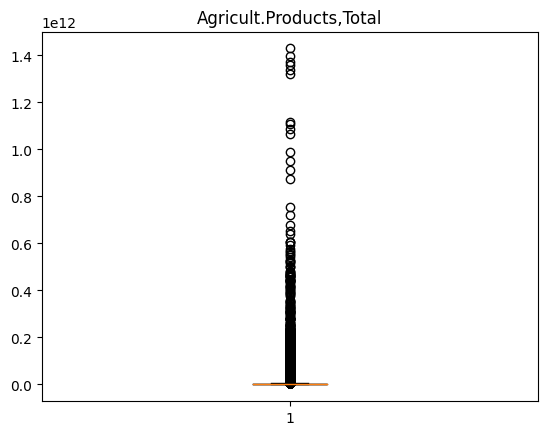

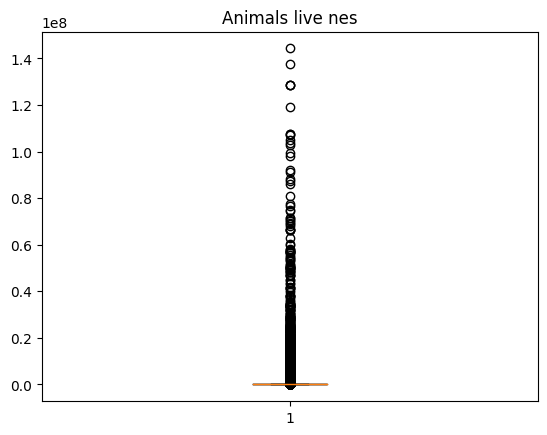

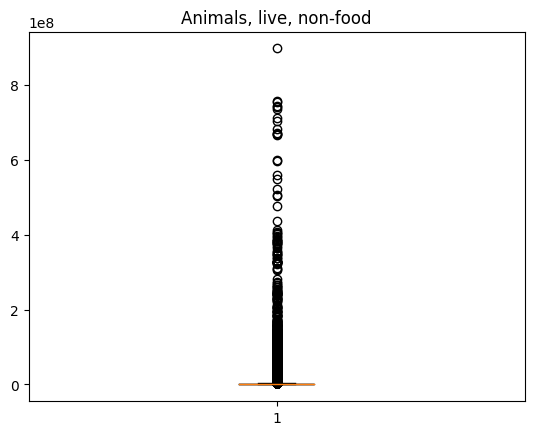

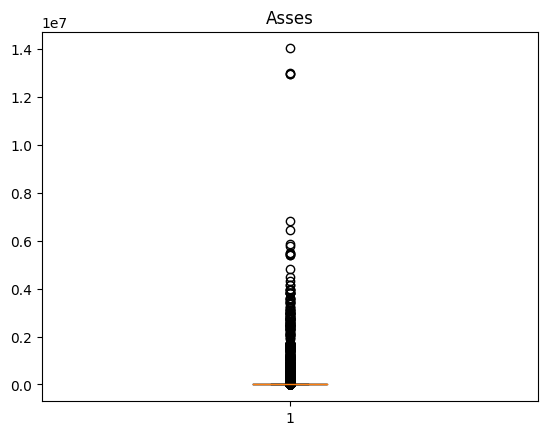

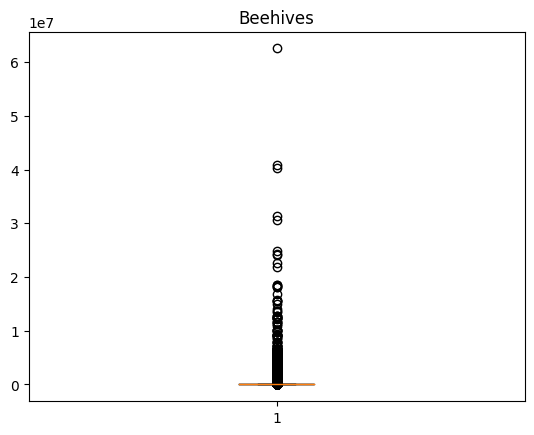

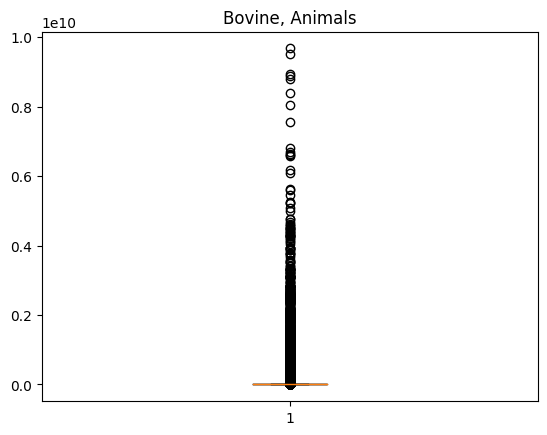

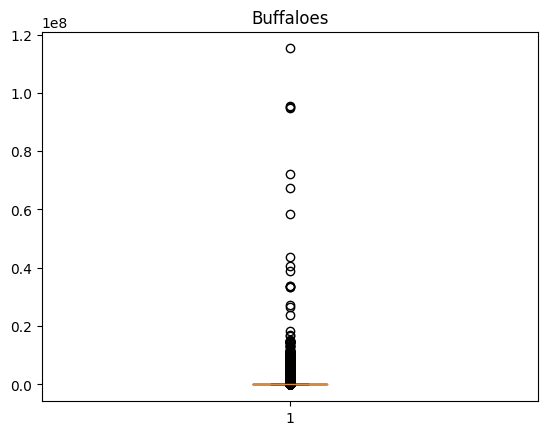

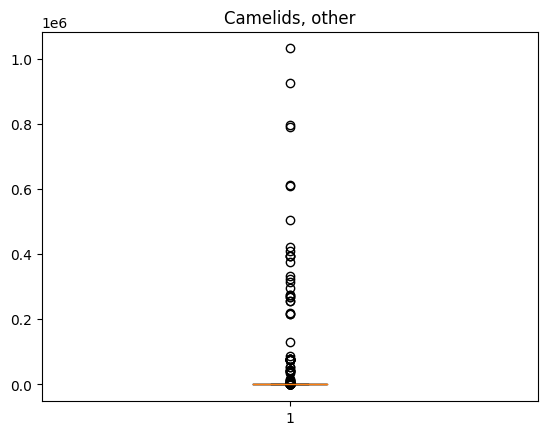

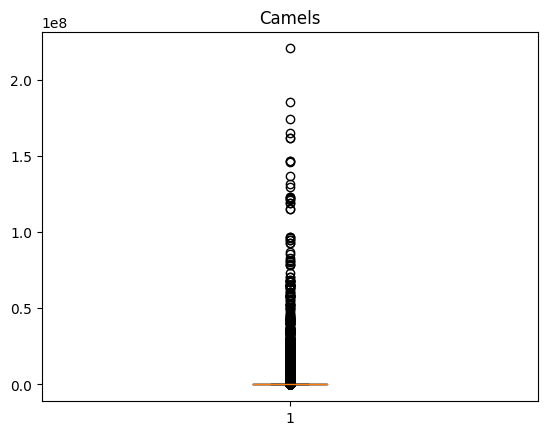

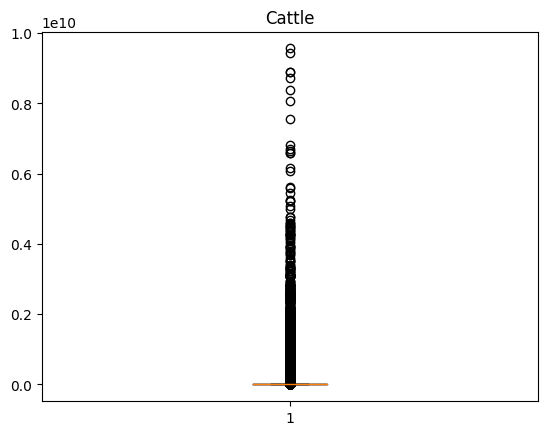

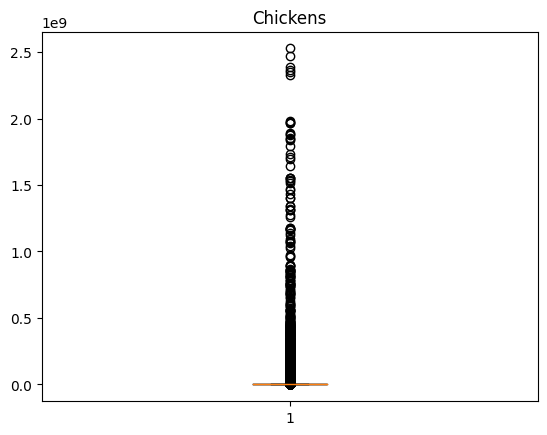

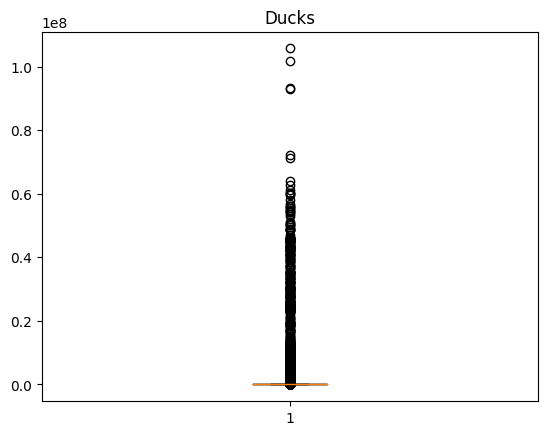

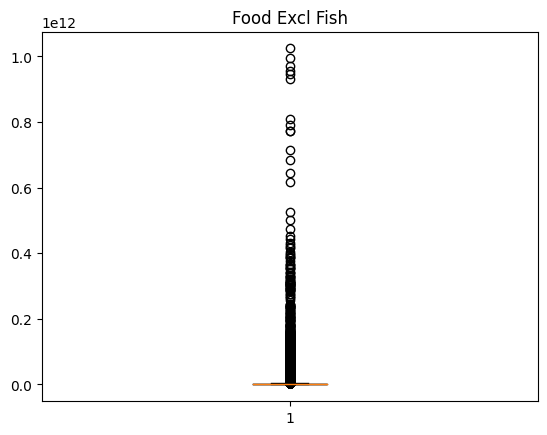

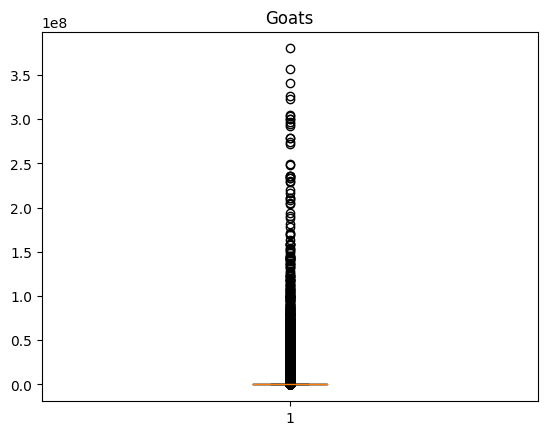

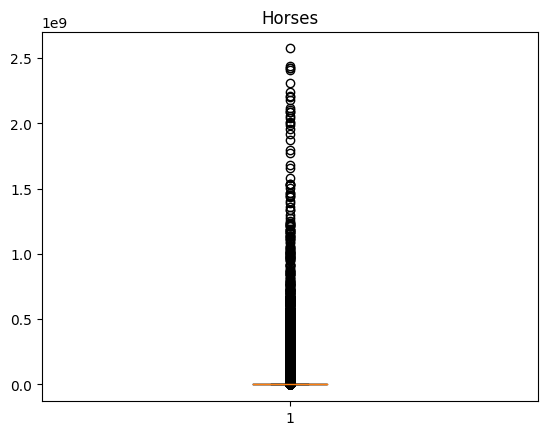

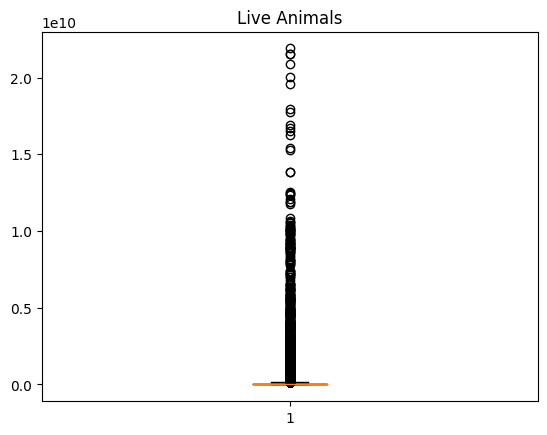

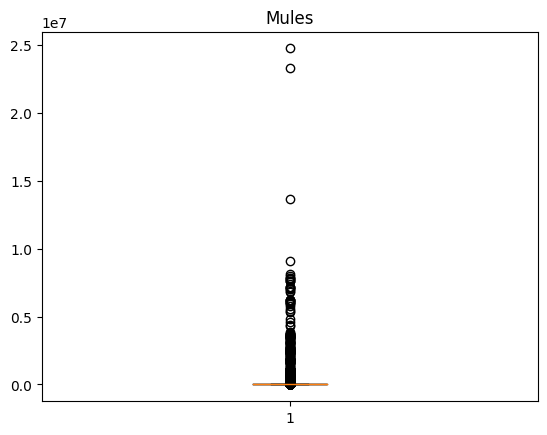

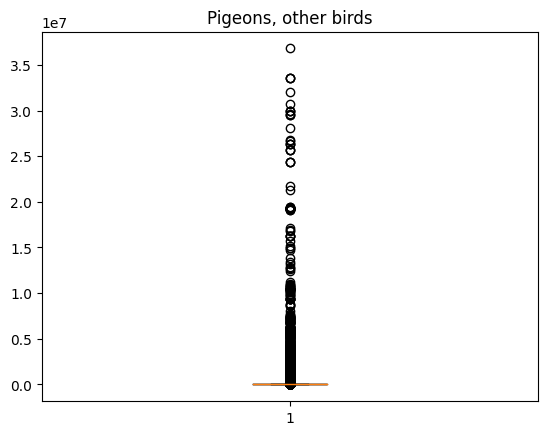

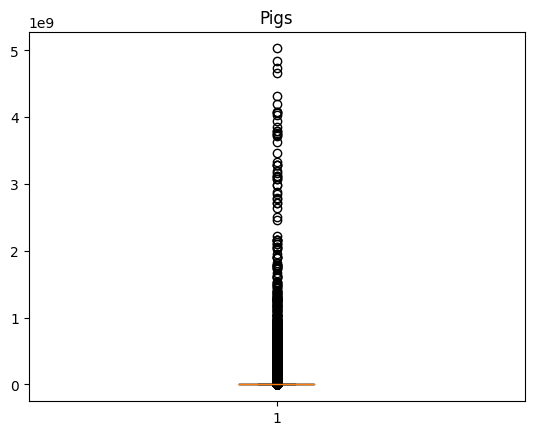

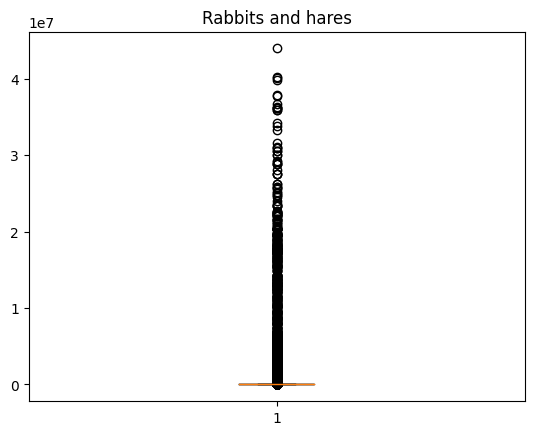

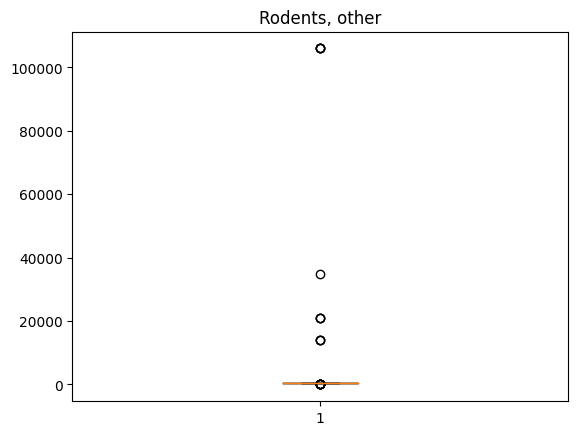

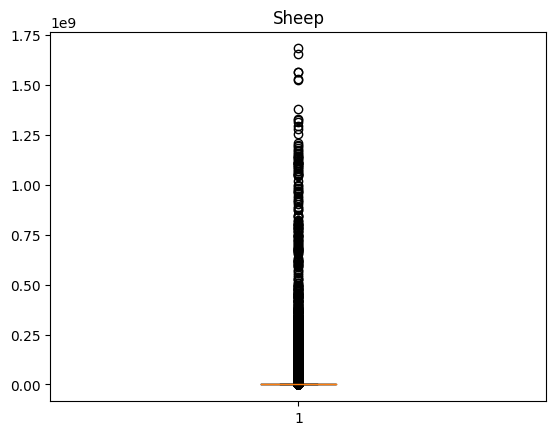

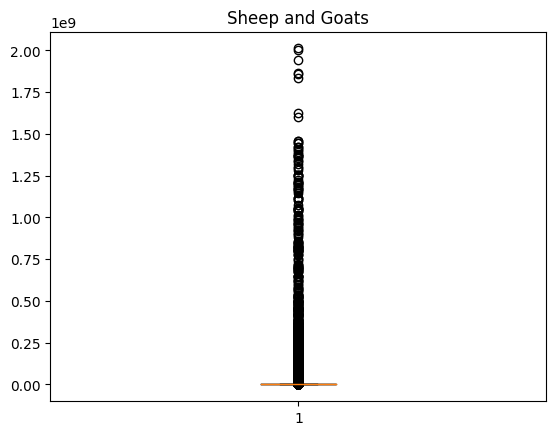

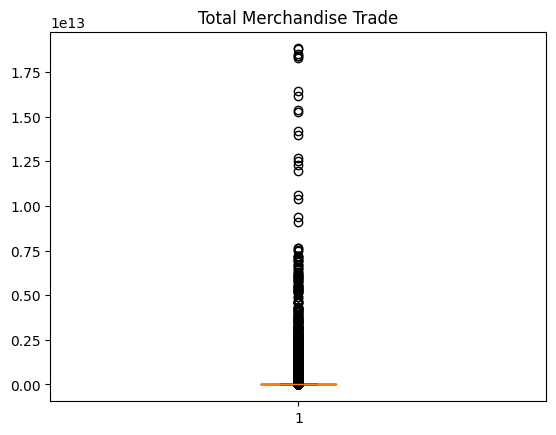

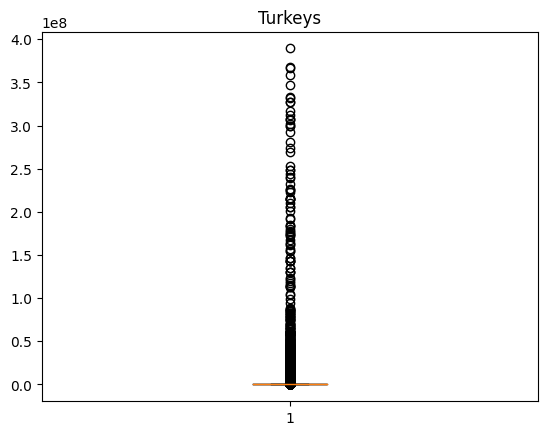

In [125]:
# prompt: Using the df2 dataset, plot Box plots for each of the unique values in the 'Item' column. Sort the dataset by 'Item' column

import matplotlib.pyplot as plt

# Create a box plot for each unique value in the 'Item' column
for item in df2['Item'].unique():
    subset = df2[df2['Item'] == item]
    plt.boxplot(subset['Value'])
    plt.title(item)
    plt.show()

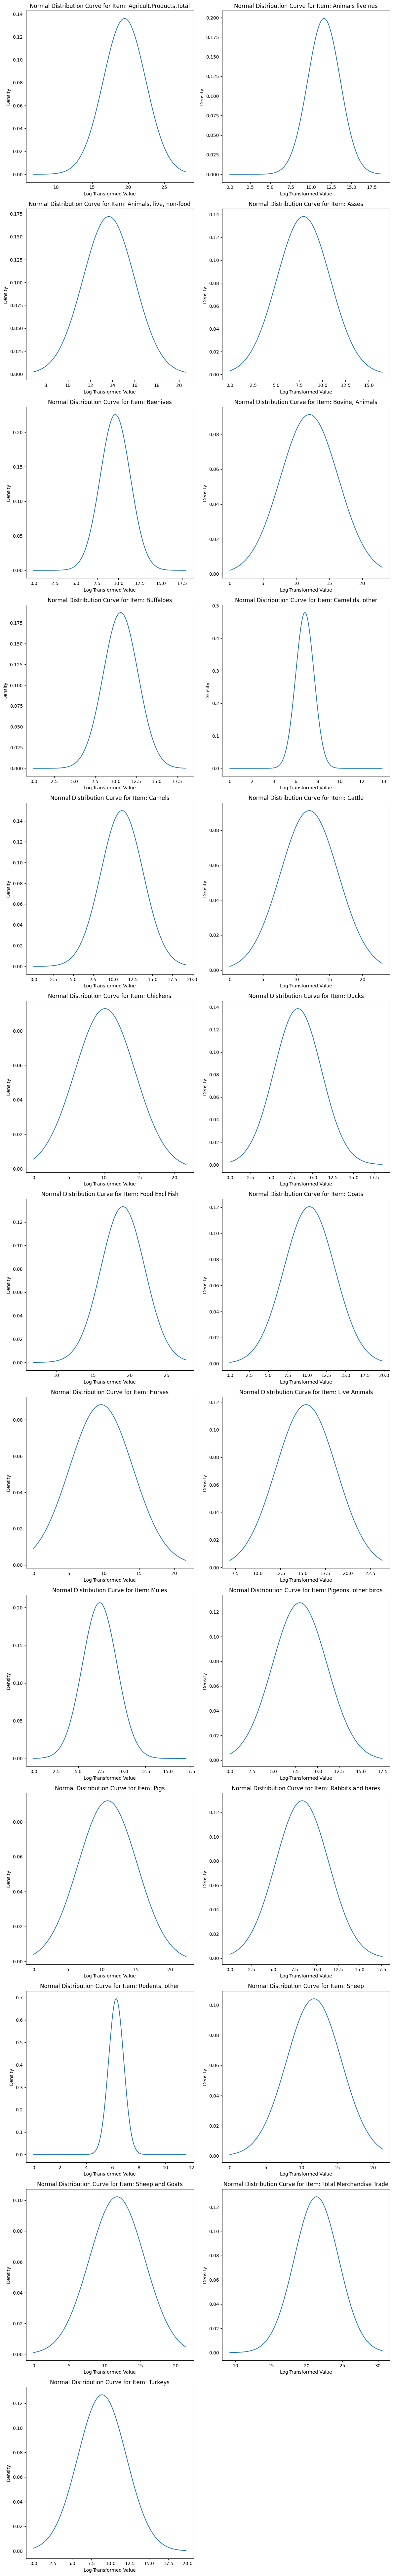

In [138]:
# Let us make normal distribution curves, after log transformation of the 'Value' column in the df4 version of the dataset
# Although the test didn't confirm normal distribution, as we can see below, we have relatively better curves with df4 version of the dataset.

# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Sort the DataFrame by 'Item' and 'Value'
sorted_df2 = df2.sort_values(by=['Item', 'Value'])

# Get the unique values in the 'Item' column and sort them
unique_items = sorted(sorted_df2['Item'].unique())

# Create a figure and axes for the normal distribution curves
num_plots = len(unique_items)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = -(-num_plots // num_cols)  # Ceiling division
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Iterate through unique elements, log transform, and create normal distribution curves
for index, item in enumerate(unique_items):
    subset = sorted_df2[sorted_df2['Item'] == item]

    # Log transform the 'Value' column
    log_transformed_values = np.log(subset['Value'])

    mean_value = log_transformed_values.mean()
    std_dev_value = log_transformed_values.std()

    x = np.linspace(log_transformed_values.min(), log_transformed_values.max(), 1000)
    y = norm.pdf(x, mean_value, std_dev_value)

    ax = axes[index]
    ax.plot(x, y)
    ax.set_title(f'Normal Distribution Curve for Item: {item}')
    ax.set_xlabel('Log-Transformed Value')
    ax.set_ylabel('Density')

# Hide any unused subplots
for index in range(len(unique_items), num_rows * num_cols):
    axes[index].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# prompt: define norm in this formula ... y = norm.pdf(x, mean_value, std_dev_value)

from scipy.stats import norm